# Mobile Phone Tariffs Analisys

Mobile phone operator offers to it's clients two tariifs: "Smart" and "Ultra". To build commercial budget marketing department needs to find out which one of them is more profitable.

Here are the deals:

"Smart"
- monthly payment - 550 rubles
- 500 minutes of calls, 50 texts and 15 gb of data are included
- 3 rubles for 1 extra minute, 3 rubles for 1 extra text and 200 rubles for 1 extra gb 

"Ultra"
- monthly payment - 1950 rubles
- 3000 minutes of calls, 1000 texts and 30 gb of data are included
- 1 ruble for 1 extra minute, 1 rubles for 1 extra text and 150 rubles for 1 extra gb

## Data Exploration

In [1]:
#libraries importing and data loading
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')



In [2]:
#explore each of them
calls.info()
calls.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
calls.describe()


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [4]:
#see how many 0 duration calls
len(calls.query('duration == 0')) / len(calls)

0.19551644316336553

In [5]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [7]:
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [9]:
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


### Conclusion

- Missing values in churn_date column. Perhapse cause of no churn clients yet    
- Column Unnamed: 0 duplicates the index
- Date columns better to convert to datetime type
- Column duration contains to much missing values (about 20%). We have to handle it somehow



## Data Preprocessing

In [12]:
#drop Unnamed: 0 column
internet = internet.drop('Unnamed: 0', axis = 1)


In [13]:
#convert date columns to datetime type
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

#round ceiling call durations and convert them to integer
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)


calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [14]:
#put all together and rename columns

messages = messages.rename(columns = {'id': 'message_id'})
internet = internet.rename(columns = {'id': 'internet_id'})
calls = calls.rename(columns = {'id': 'call_id'})
tariffs = tariffs.rename(columns = {'tariff_name': 'tariff'})



In [15]:
#extract and add months
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
users['month'] = pd.DatetimeIndex(users['reg_date']).month


In [16]:
#calculate amount of calls and texts and internet traffic for each month

calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='message_id', aggfunc='count')
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
users_pivot = users.set_index(['user_id', 'month'])



In [17]:
#join datasets
data = calls_pivot.join([messages_pivot, internet_pivot], how='outer')

In [18]:
#rename columns
data = data.rename(columns = {('count', 'duration'): 'calls_number', ('sum', 'duration'): 'calls_duration'})

In [19]:
#join users dataset and drop index
data = data.join(users_pivot, how='left')

data = data.reset_index()

tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

In [20]:
#drop user names
data = data.drop(['first_name', 'last_name'], axis = 1)

In [21]:
data.shape

(3214, 11)

In [22]:
data.user_id.nunique()

498

In [23]:
#fill values in joined dataframe
#they appeared cause of reg_date column

columns = ['age', 'city', 'reg_date', 'tariff']
for i in columns:
    data[i] = data[i].fillna(data.groupby('user_id')[i].transform('first')) 

data.head(30)

,user_id,month,calls_number,calls_duration,message_id,mb_used,age,churn_date,city,reg_date,tariff
0,1000,5,22.0,159.0,22.0,2253.49,52.0,NaN,Краснодар,2018-05-25,ultra
1,1000,6,43.0,172.0,60.0,23233.77,52.0,NaN,Краснодар,2018-05-25,ultra
2,1000,7,47.0,340.0,75.0,14003.64,52.0,NaN,Краснодар,2018-05-25,ultra
3,1000,8,52.0,408.0,81.0,14055.93,52.0,NaN,Краснодар,2018-05-25,ultra
4,1000,9,58.0,466.0,57.0,14568.91,52.0,NaN,Краснодар,2018-05-25,ultra
5,1000,10,57.0,350.0,73.0,14702.49,52.0,NaN,Краснодар,2018-05-25,ultra
6,1000,11,43.0,338.0,58.0,14756.47,52.0,NaN,Краснодар,2018-05-25,ultra
7,1000,12,46.0,333.0,70.0,9817.61,52.0,NaN,Краснодар,2018-05-25,ultra
8,1001,11,59.0,430.0,NaN,18429.34,41.0,NaN,Москва,2018-11-01,smart
9,1001,12,63.0,414.0,NaN,14036.66,41.0,NaN,Москва,2018-11-01,smart


In [24]:
# fill missing values in months with 0
data[['calls_number', 'calls_duration', 'message_id', 'mb_used']] = data[['calls_number', 'calls_duration', 'message_id', 'mb_used']].fillna(0) 


In [25]:
#join the tarrifs dataframe
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

data = data.merge(tariffs, how='left')


data.head()

,user_id,month,calls_number,calls_duration,message_id,mb_used,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,2253.49,52.0,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23233.77,52.0,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14003.64,52.0,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14055.93,52.0,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,14568.91,52.0,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


### Conclusion

- data type of certain columns has converted
- calculated amount of texts for each month
- calculated network traffic for each month
- all dataframes put together

## Additional Calculations

In [27]:
dataset = data.set_index(['user_id', 'month'])
dataset

calls_number  calls_duration  message_id   mb_used   age  \
user_id month                                                             
1000    5              22.0           159.0        22.0   2253.49  52.0   
        6              43.0           172.0        60.0  23233.77  52.0   
        7              47.0           340.0        75.0  14003.64  52.0   
        8              52.0           408.0        81.0  14055.93  52.0   
        9              58.0           466.0        57.0  14568.91  52.0   
...                     ...             ...         ...       ...   ...   
1498    10             41.0           247.0        42.0  20579.36  68.0   
1499    9               9.0            70.0        11.0   1845.75  35.0   
        10             68.0           449.0        48.0  17788.51  35.0   
        11             74.0           612.0        59.0  17963.31  35.0   
        12             69.0           492.0        66.0  13055.58  35.0   

              churn_date         city   reg_date tariff  messages_included  \
user_id month                                                                
1000    5            NaN    Краснодар 2018-05-25  ultra               1000   
        6            NaN    Краснодар 2018-05-25  ultra               1000   
        7            NaN    Краснодар 2018-05-25  ultra               1000   
        8            NaN    Краснодар 2018-05-25  ultra               1000   
        9            NaN    Краснодар 2018-05-25  ultra               1000   
...                  ...          ...        ...    ...                ...   
1498    10           NaN  Владикавказ 2018-07-19  smart                 50   
1499    9            NaN        Пермь 2018-09-27  smart                 50   
        10           NaN        Пермь 2018-09-27  smart                 50   
        11           NaN        Пермь 2018-09-27  smart                 50   
        12           NaN        Пермь 2018-09-27  smart                 50   

               mb_per_month_included  minutes_included  rub_monthly_fee  \
user_id month                                                             
1000    5                      30720              3000             1950   
        6                      30720              3000             1950   
        7                      30720              3000             1950   
        8                      30720              3000             1950   
        9                      30720              3000             1950   
...                              ...               ...              ...   
1498    10                     15360               500              550   
1499    9                      15360               500              550   
        10                     15360               500              550   
        11                     15360               500              550   
        12                     15360               500              550   

               rub_per_gb  rub_per_message  rub_per_minute  
user_id month                                               
1000    5             150                1               1  
        6             150                1               1  
        7             150                1               1  
        8             150                1               1  
        9             150                1               1  
...                   ...              ...             ...  
1498    10            200                3               3  
1499    9             200                3               3  
        10            200                3               3  
        11            200                3               3  
        12            200                3               3  

[3214 rows x 16 columns]

In [28]:
#convert monthly network traffic to gb and round it as a mobile operator does
dataset['gb_used'] = (dataset['mb_used'] / 1024).apply(np.ceil)
dataset['mb_per_month_included'] = dataset['mb_per_month_included'] / 1024
dataset = dataset.rename(columns = {'mb_per_month_included': 'gb_per_month_included'})

dataset.head()

calls_number  calls_duration  message_id   mb_used   age  \
user_id month                                                             
1000    5              22.0           159.0        22.0   2253.49  52.0   
        6              43.0           172.0        60.0  23233.77  52.0   
        7              47.0           340.0        75.0  14003.64  52.0   
        8              52.0           408.0        81.0  14055.93  52.0   
        9              58.0           466.0        57.0  14568.91  52.0   

              churn_date       city   reg_date tariff  messages_included  \
user_id month                                                              
1000    5            NaN  Краснодар 2018-05-25  ultra               1000   
        6            NaN  Краснодар 2018-05-25  ultra               1000   
        7            NaN  Краснодар 2018-05-25  ultra               1000   
        8            NaN  Краснодар 2018-05-25  ultra               1000   
        9            NaN  Краснодар 2018-05-25  ultra               1000   

               gb_per_month_included  minutes_included  rub_monthly_fee  \
user_id month                                                             
1000    5                       30.0              3000             1950   
        6                       30.0              3000             1950   
        7                       30.0              3000             1950   
        8                       30.0              3000             1950   
        9                       30.0              3000             1950   

               rub_per_gb  rub_per_message  rub_per_minute  gb_used  
user_id month                                                        
1000    5             150                1               1      3.0  
        6             150                1               1     23.0  
        7             150                1               1     14.0  
        8             150                1               1     14.0  
        9             150                1               1     15.0

In [29]:
#calculate extra phone calls, texts and data traffic
dataset['extra_calls'] = [0 if dataset['minutes_included'][i] > dataset['calls_duration'][i] else
                            dataset['calls_duration'][i] - dataset['minutes_included'][i] for i in dataset.index]

dataset['extra_sms'] = [0 if dataset['messages_included'][i] > dataset['message_id'][i] else
                            dataset['message_id'][i] - dataset['messages_included'][i] for i in dataset.index]

dataset['extra_gb'] = [0 if dataset['gb_per_month_included'][i] > dataset['gb_used'][i] else
                            dataset['gb_used'][i] - dataset['gb_per_month_included'][i] for i in dataset.index]

dataset.head()

calls_number  calls_duration  message_id   mb_used   age  \
user_id month                                                             
1000    5              22.0           159.0        22.0   2253.49  52.0   
        6              43.0           172.0        60.0  23233.77  52.0   
        7              47.0           340.0        75.0  14003.64  52.0   
        8              52.0           408.0        81.0  14055.93  52.0   
        9              58.0           466.0        57.0  14568.91  52.0   

              churn_date       city   reg_date tariff  messages_included  \
user_id month                                                              
1000    5            NaN  Краснодар 2018-05-25  ultra               1000   
        6            NaN  Краснодар 2018-05-25  ultra               1000   
        7            NaN  Краснодар 2018-05-25  ultra               1000   
        8            NaN  Краснодар 2018-05-25  ultra               1000   
        9            NaN  Краснодар 2018-05-25  ultra               1000   

               gb_per_month_included  minutes_included  rub_monthly_fee  \
user_id month                                                             
1000    5                       30.0              3000             1950   
        6                       30.0              3000             1950   
        7                       30.0              3000             1950   
        8                       30.0              3000             1950   
        9                       30.0              3000             1950   

               rub_per_gb  rub_per_message  rub_per_minute  gb_used  \
user_id month                                                         
1000    5             150                1               1      3.0   
        6             150                1               1     23.0   
        7             150                1               1     14.0   
        8             150                1               1     14.0   
        9             150                1               1     15.0   

               extra_calls  extra_sms  extra_gb  
user_id month                                    
1000    5              0.0        0.0       0.0  
        6              0.0        0.0       0.0  
        7              0.0        0.0       0.0  
        8              0.0        0.0       0.0  
        9              0.0        0.0       0.0

In [30]:
#monthly earnings from each client
dataset['earnings'] = dataset['extra_calls'] * dataset['rub_per_minute'] + dataset['extra_sms'] * dataset['rub_per_message'] + dataset['extra_gb'] * dataset['rub_per_gb'] + dataset['rub_monthly_fee']
dataset.head()

calls_number  calls_duration  message_id   mb_used   age  \
user_id month                                                             
1000    5              22.0           159.0        22.0   2253.49  52.0   
        6              43.0           172.0        60.0  23233.77  52.0   
        7              47.0           340.0        75.0  14003.64  52.0   
        8              52.0           408.0        81.0  14055.93  52.0   
        9              58.0           466.0        57.0  14568.91  52.0   

              churn_date       city   reg_date tariff  messages_included  ...  \
user_id month                                                             ...   
1000    5            NaN  Краснодар 2018-05-25  ultra               1000  ...   
        6            NaN  Краснодар 2018-05-25  ultra               1000  ...   
        7            NaN  Краснодар 2018-05-25  ultra               1000  ...   
        8            NaN  Краснодар 2018-05-25  ultra               1000  ...   
        9            NaN  Краснодар 2018-05-25  ultra               1000  ...   

               minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
user_id month                                                                   
1000    5                  3000             1950         150                1   
        6                  3000             1950         150                1   
        7                  3000             1950         150                1   
        8                  3000             1950         150                1   
        9                  3000             1950         150                1   

               rub_per_minute  gb_used  extra_calls  extra_sms  extra_gb  \
user_id month                                                              
1000    5                   1      3.0          0.0        0.0       0.0   
        6                   1     23.0          0.0        0.0       0.0   
        7                   1     14.0          0.0        0.0       0.0   
        8                   1     14.0          0.0        0.0       0.0   
        9                   1     15.0          0.0        0.0       0.0   

               earnings  
user_id month            
1000    5        1950.0  
        6        1950.0  
        7        1950.0  
        8        1950.0  
        9        1950.0  

[5 rows x 21 columns]

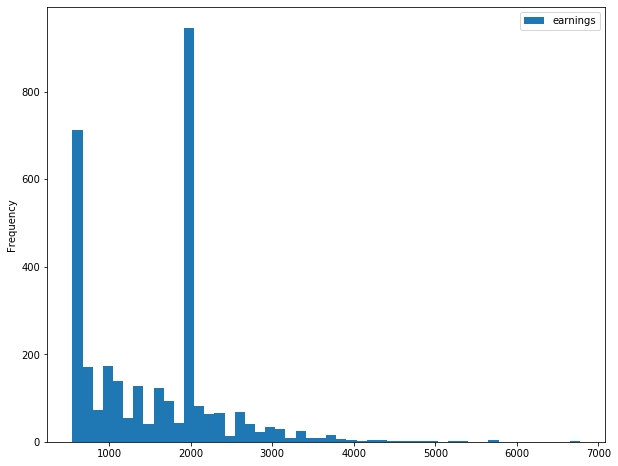

In [31]:
#distribution of earnings from each client per month
dataset.plot(kind='hist', y='earnings', bins=50, figsize=(10, 8))


In [32]:
dataset['earnings'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: earnings, dtype: float64

### Conclusion

Calculated monthly earnings from each clients. Usualy clients don't get ride of included services

## Data Analisys

In [33]:
#client portreit for each tariff
smart_users = dataset.query('tariff == "smart"')
ultra_users = dataset.query('tariff == "ultra"')

In [34]:
smart_users.describe()

,calls_number,calls_duration,message_id,mb_used,age,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,extra_calls,extra_sms,extra_gb,earnings
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,58.463437,417.934948,33.384029,16208.386990,46.556303,50.0,15.0,500.0,550.0,200.0,3.0,3.0,16.328847,41.605653,5.799910,2.988784,1289.973531
std,25.939858,190.313730,28.227876,5870.476681,16.353371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.747061,84.678573,13.442456,3.682820,818.404367
min,0.000000,0.000000,0.000000,0.000000,18.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,0.000000,0.000000,0.000000,0.000000,550.000000
25%,40.000000,282.000000,10.000000,12643.010000,32.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,13.000000,0.000000,0.000000,0.000000,550.000000
50%,60.000000,422.000000,28.000000,16506.840000,47.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,17.000000,0.000000,0.000000,2.000000,1023.000000
75%,76.000000,545.000000,51.000000,20042.930000,62.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,20.000000,45.000000,1.000000,5.000000,1750.000000
max,198.000000,1435.000000,143.000000,38552.450000,75.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,38.000000,935.000000,93.000000,23.000000,6770.000000


In [35]:
ultra_users.describe()

,calls_number,calls_duration,message_id,mb_used,age,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,extra_calls,extra_sms,extra_gb,earnings
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.000000,985.0,985.0,985.000000,985.000000
mean,73.392893,526.623350,49.363452,19468.805208,46.834518,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,19.494416,0.0,0.0,0.801015,2070.152284
std,43.916853,317.606098,47.804457,10087.170752,17.107979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.853511,0.0,0.0,2.507914,376.187114
min,0.000000,0.000000,0.000000,0.000000,18.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,0.000000,0.0,0.0,0.000000,1950.000000
25%,41.000000,284.000000,6.000000,11770.260000,30.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,12.000000,0.0,0.0,0.000000,1950.000000
50%,74.000000,518.000000,38.000000,19308.010000,45.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,19.000000,0.0,0.0,0.000000,1950.000000
75%,104.000000,752.000000,79.000000,26837.690000,63.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,27.000000,0.0,0.0,0.000000,1950.000000
max,244.000000,1673.000000,224.000000,49745.690000,75.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,49.000000,0.0,0.0,19.000000,4800.000000


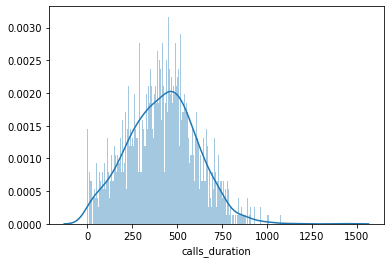

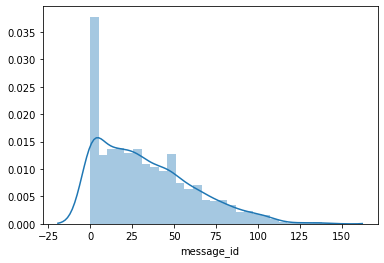

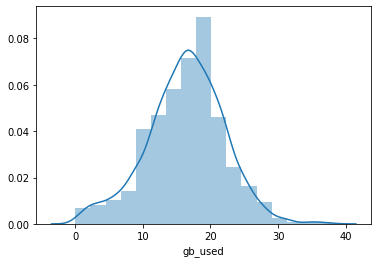

In [36]:
#plot histograms for "Smart" users
smart_cols_to_plot = smart_users[['calls_duration', 'message_id', 'gb_used']]
for col in smart_cols_to_plot:
    sns.distplot(smart_cols_to_plot[col], bins=int(smart_cols_to_plot[col].quantile(0.5)))
    plt.show()    

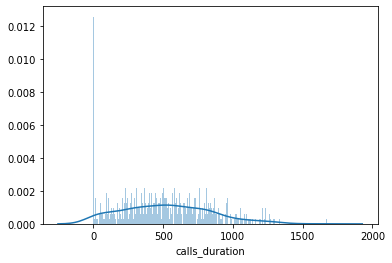

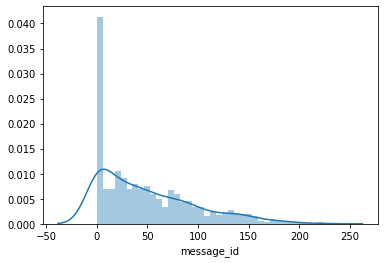

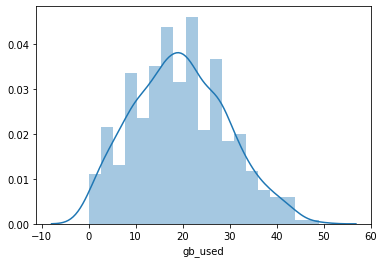

In [37]:
#the same for "Ultra" users
ultra_cols_to_plot = ultra_users[['calls_duration', 'message_id', 'gb_used']]
for col in ultra_cols_to_plot:
    sns.distplot(ultra_cols_to_plot[col], bins=int(ultra_cols_to_plot[col].quantile(0.5)))
    plt.show()

### Conclusion

Comparing users monthly activity of both tarrifs we can say that:

- "Smart" is cheaper and more popular 
- Average call of "Ultra" users is 20% longer, standard deviation is greater
- Average amounth of text messages of "Ultra" users is almost 2 times greater 
- Average network traffic value of "Ultra" users is 82% more
- "Smart" users usually run off included services. They need 21 more minutes of calls, 6 text messages and 3 gb of network traffic. Meanwhile "Ultra" clients are usually are good with included services. Except may be extra 1 gb of data traffic.
- Call duration and network traffic distributions are look normal. Text messages distributions are skewed to the rights. It means there are outliers.

## Statistical Hypothesis Testing

### Test hypothesis: "avarage profits from "Ultra" and "Smart" users are not different"

Let's vocabulate null hypothesis as "avarage profits from "Ultra" and "Smart" users are not different". Then alternative hypotesis would be "avarage profits from "Ultra" and "Smart" users are different".  Amount of mean values from sample is large enough. Therefore on grounds of Central Limit Theorem the distribution of a sample variable approximates a normal distribution. So we can run T-test.

In [45]:
#check a stndard deviation
dataset.query('tariff == "ultra"')['earnings'].std()

376.1871144505328

In [46]:
dataset.query('tariff == "smart"')['earnings'].std()

818.4043670499469

In [39]:
alpha = 0.05

results = st.ttest_ind(ultra_users['earnings'], smart_users['earnings'], equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis') 

p-value: 4.2606313931076085e-250
Reject null hypothesis


### Conclusion

Assumption that avarage profits from "Ultra" and "Smart" users are not differen is not approved by observations. Actually we know from previouse part that difference between them is 60%.

### Test hypothesis:  "avarage profit from Moscow is different then from other regions"

Let's vocabulate null hypothesis as "avarage profit from Moscow is not different then from other regions". Then alternative hypotesis would be "avarage profit from Moscow is different then from other regions". Amount of mean values from sample is large enough. Therefore on grounds of Central Limit Theorem the distribution of a sample variable approximates a normal distribution. So we can run T-test.

In [47]:
#check a stndard deviation
dataset.query('city != "Москва"')['earnings'].std()

808.7877524553716

In [48]:
#check a stndard deviation
dataset.query('city == "Москва"')['earnings'].std()

752.0880713133841

In [49]:
alpha = 0.05

results = st.ttest_ind(dataset.query('city == "Москва"')['earnings'], dataset.query('city != "Москва"')['earnings'], equal_var=True)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis') 

p-value: 0.5440152911670224
Fail to reject null hypothesis


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
    
    
    
</div>

In [43]:
#check the result
dataset.query('city != "Москва"')['earnings'].mean()

1524.9362274298885

In [44]:
dataset.query('city == "Москва"')['earnings'].mean()

1546.7135842880523

### Conclusion

Assumption that avarage profit from Moscow is different then from other regions is not approved by observations. We can see that average profits are close enough.

## General Conclusion

"Ultra" tariff is more profitable. It's also more expensive and that matter probably scares potential customers. So we can porpose mobile operator to explain to their clients that "Ultra" tariff is already includes all what they need. And if they need more it would not be so expansive.   